In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
print(os.listdir("../input"))

['dog-or-cat', 'mla-z-cat-dog-classification']


In [3]:
os.listdir("../input/mla-z-cat-dog-classification")

['test_set', 'training_set']

# Credits and Links

* UDEMY - Machine Learning A-Z <sup>TM</sup>*

<a id="index"></a>
# Table of Content

1. [Importing Libraries](#1)
2. [Data Preprocessing](#2)
- 2.1 [Preprocessing Training Set](#2.1)
- 2.2 [Preprocessing Test Set](#2.2)
3. [Building the CNN (Convolution Neural Network)](#3)
- 3.1 [Initializing CNN](#3.1)
- 3.2 [Step1 - Convolution](#3.2)
- 3.3 [Step2 - Pooling](#3.3)
- 3.4 [Adding a 2nd Convolution Layer](#3.4)
- 3.5 [Step3 - Flattening](#3.5)
- 3.6 [Step4 - Full Connection](#3.6)
- 3.7 [Step5 - Output Layer](#3.7)
4. [Training the CNN](#4)
- 4.1 [Compiling the CNN](#4.1)
- 4.2 [Training the CNN on the Training set and evaluating on Test set](#4.2)
5. [Making a single prediction](#5)

<a id="1"></a>
# 1. Importing Libraries

[Go back to Index](#index)

In [4]:
#1. General
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

#3. CNN Library
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

#Misc
from PIL import Image
from IPython.display import display

In [5]:
tf.__version__

'2.13.0'

<a id="2"></a>
# 2. Data Preprocessing

[Go back to Index](#index)

<a id="2.1"></a>
## 2.1 Preprocessing Training Set

[Go back to Index](#index)

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [7]:
training_set = train_datagen.flow_from_directory(
    '../input/mla-z-cat-dog-classification/training_set/training_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 8000 images belonging to 2 classes.


<a id="2.2"></a>
## 2.2 Preprocessing Test Set

[Go back to Index](#index)

In [8]:
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [9]:
test_set = test_datagen.flow_from_directory(
        '../input/mla-z-cat-dog-classification/test_set/test_set',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


<a id="3"></a>
# 3. Building the CNN (Convolutional Neural Network)

[Go back to Index](#index)

<a id="3.1"></a>
## 3.1 Initializing the CNN

[Go back to Index](#index)

In [10]:
cnn = tf.keras.models.Sequential()

<a id="3.2"></a>
## 3.2 Step1 - Convolution

[Go back to Index](#index)

In [11]:
cnn.add(
    tf.keras.layers.Conv2D(
        filters=32, 
        kernel_size=3, 
        activation='relu', 
        input_shape=[64, 64, 3]
    )
)

<a id="3.3"></a>
## 3.3 Step2 - Pooling

[Go back to Index](#index)

In [12]:
cnn.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2, strides=2
    )
)

<a id="3.4"></a>
## 3.4 Adding a second convolutional layer

[Go back to Index](#index)

In [13]:
cnn.add(
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, activation='relu')
)

In [14]:
cnn.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2, strides=2
    )
)

<a id="3.5"></a>
## 3.5 Step3 - Flattening

[Go back to Index](#index)

In [15]:
cnn.add(
    tf.keras.layers.Flatten()
)

<a id="3.6"></a>
## 3.6 Step4 - Full Connection

[Go back to Index](#index)

In [16]:
cnn.add(
    tf.keras.layers.Dense(
        units=128, activation='relu'
    )
)

<a id="3.7"></a>
## 3.7 Step5 - Output Layer

[Go back to Index](#index)

In [17]:
cnn.add(
    tf.keras.layers.Dense(
        units=1, activation='sigmoid'
    )
)

<a id="4"></a>
# 4. Training the CNN

[Go back to Index](#index)

<a id="4.1"></a>
## 4.1 Compiling the CNN

[Go back to Index](#index)

In [18]:
cnn.compile(
    optimizer = 'adam', 
    loss = 'binary_crossentropy', 
    metrics = ['accuracy']
)

<a id="4.2"></a>
## 4.2 Training the CNN on Training Set and evaluating on Test Set

[Go back to Index](#index)

In [19]:
cnn.fit(
    x = training_set, 
    validation_data = test_set, 
    epochs = 25
)

Epoch 1/25
250/250 [==============================] - 69s 271ms/step - loss: 0.6753 - accuracy: 0.5750 - val_loss: 0.6894 - val_accuracy: 0.5775
Epoch 2/25
250/250 [==============================] - 44s 177ms/step - loss: 0.6059 - accuracy: 0.6756 - val_loss: 0.5784 - val_accuracy: 0.7045
Epoch 3/25
250/250 [==============================] - 44s 175ms/step - loss: 0.5660 - accuracy: 0.7000 - val_loss: 0.5370 - val_accuracy: 0.7380
Epoch 4/25
250/250 [==============================] - 44s 175ms/step - loss: 0.5222 - accuracy: 0.7381 - val_loss: 0.4999 - val_accuracy: 0.7515
Epoch 5/25
250/250 [==============================] - 43s 173ms/step - loss: 0.4989 - accuracy: 0.7607 - val_loss: 0.4994 - val_accuracy: 0.7590
Epoch 6/25
250/250 [==============================] - 49s 197ms/step - loss: 0.4871 - accuracy: 0.7656 - val_loss: 0.4788 - val_accuracy: 0.7645
Epoch 7/25
250/250 [==============================] - 44s 177ms/step - loss: 0.4692 - accuracy: 0.7751 - val_loss: 0.4927 - val_ac

<a id="5"></a>
# 5. Making a single prediction

[Go back to Index](#index)

In [20]:
test_image = image.load_img(
    '../input/dog-or-cat/dog_or_cat.jpg', 
    target_size = (64, 64)
)

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [21]:
result = cnn.predict(test_image)
training_set.class_indices

1/1 [==============================] - 0s 127ms/step


{'cats': 0, 'dogs': 1}

In [22]:
result[0][0]

1.0

In [23]:
if result[0][0] == 1.0:
    prediction = 'dog'
else:
    prediction = 'cat'

In [24]:
prediction

'dog'

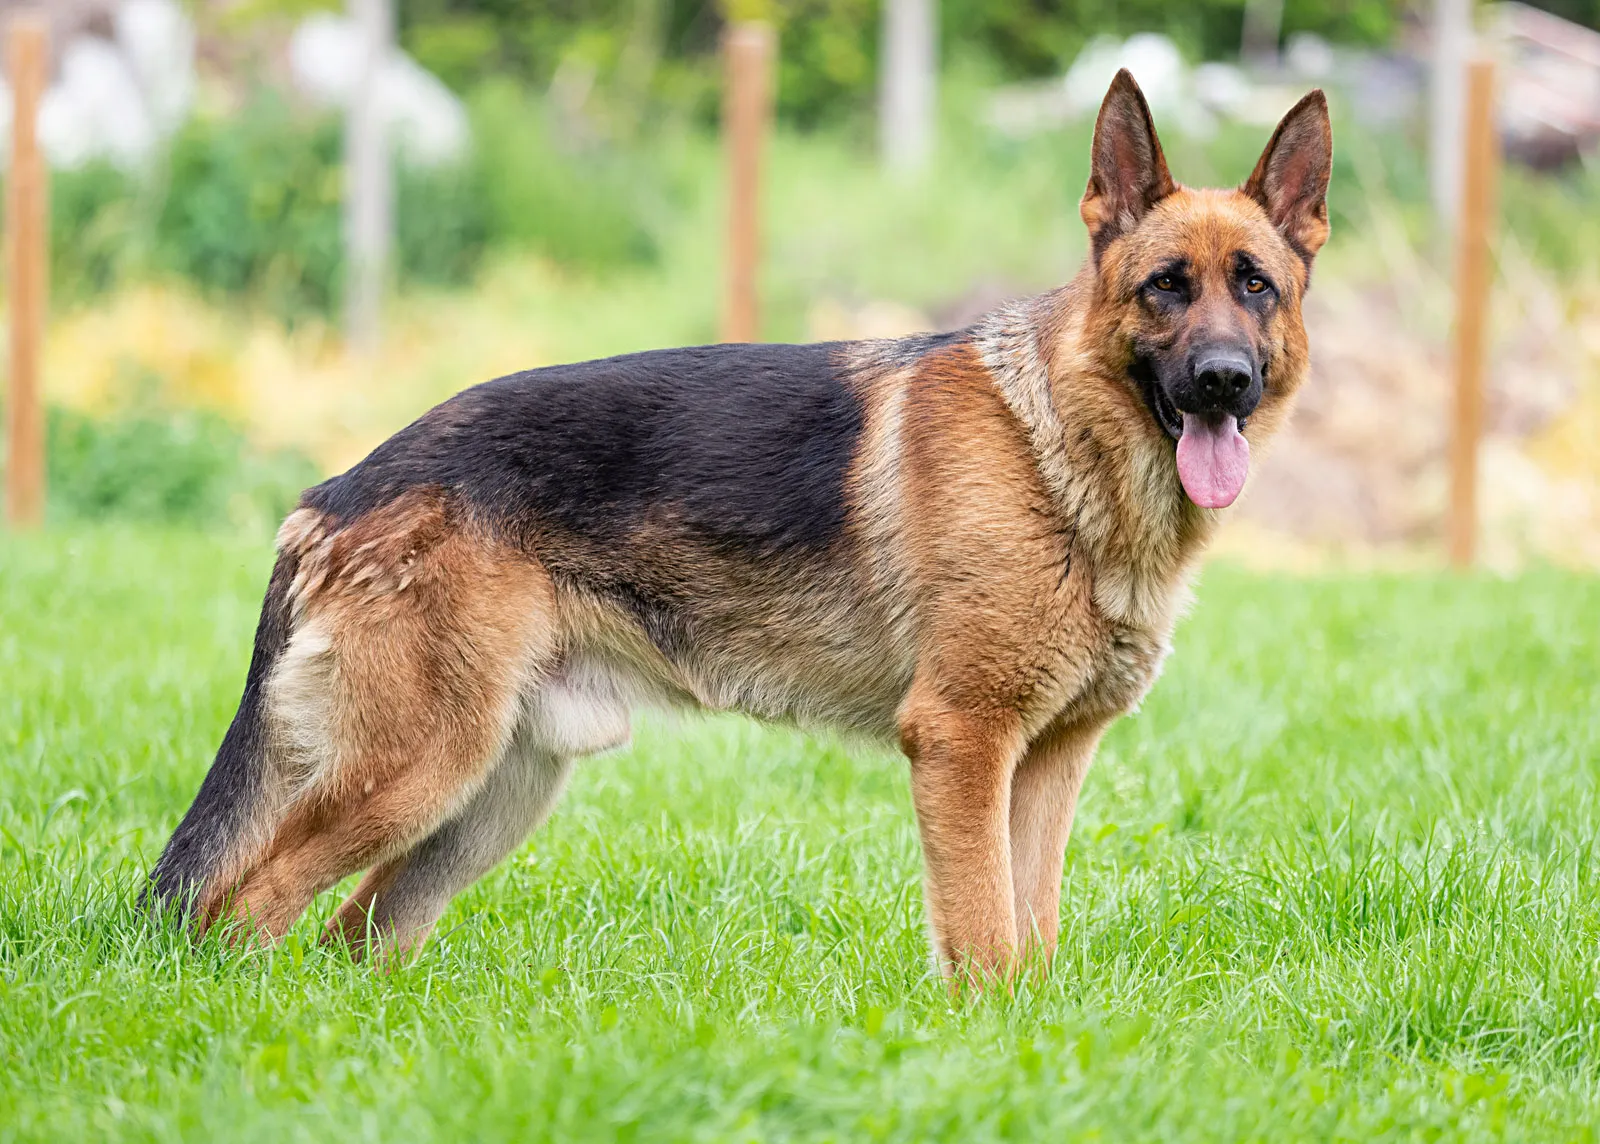

In [25]:
img = Image.open('../input/dog-or-cat/dog_or_cat.jpg')
display(img)

### Prediction was correct !